In [5]:
%pip install networkx
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


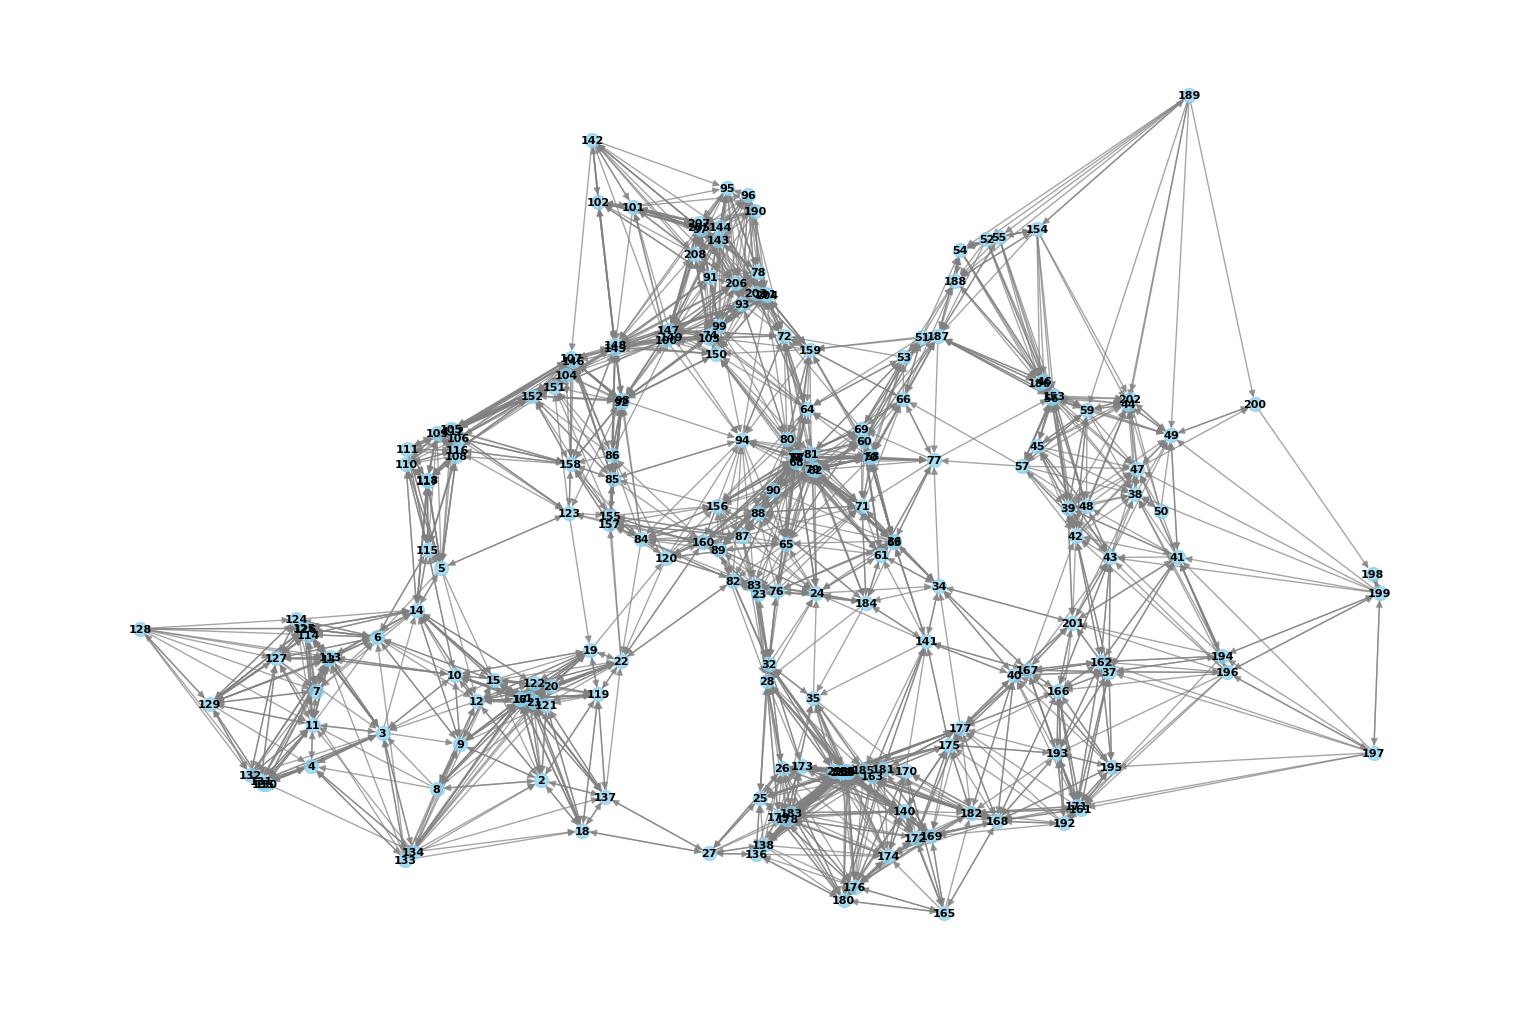

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load data from JSON files
with open('./data/info_point.json', 'r', encoding='utf-8') as f:
    infor_points = json.load(f)

with open('./data/208Points.json', 'r', encoding='utf-8') as f:
    distances_data = json.load(f)

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes to the graph with location data
for point in infor_points:
    node_id = point['id']
    G.add_node(node_id, title=point['title'], position=point['position'], address=point['address'])

# Add edges to the graph with distance, duration, and speed information
for entry in distances_data:
    from_id = entry['id']
    for distance in entry['distances']:
        to_id = distance['id']
        G.add_edge(
            from_id,
            to_id,
            average_speed=distance['averageSpeed'],
            duration=distance['duration'],
            length=distance['length'],
            base_duration=distance['baseDuration']
        )

# Create the position dictionary for drawing the graph
pos = {node: (data['position']['lng'], data['position']['lat']) for node, data in G.nodes(data=True)}

# Create labels for the nodes, using 'fromIndex' as the label
labels = {node: str(index + 1) for index, node in enumerate(G.nodes())}

# Draw the graph
plt.figure(figsize=(15, 10))

# Draw nodes and edges with customized settings
nx.draw(G, pos, with_labels=False, node_size=100, node_color='skyblue', edge_color='gray', alpha=0.7)

# Add labels to nodes
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black', font_weight='semibold')

# Add title and show the plot

plt.show()
